### Improving Employee Retention by Predicting Employee Attrition Using Machine Learning
Perusahaan saat ini sedang dilanda masalah besar, banyak karyawan yang mengajukan pengunduran diri namun perusahaan belum mengambil keputusan untuk hal itu. Bantulah perusahaan untuk menjelaskan kondisi karyawannya saat ini, serta menelusuri permasalahan yang ada dalam perusahaan yang menyebabkan karyawan itu resign sehingga dapat mengurangi tingkat resign dari karyawan, dan dapat menjabarkan suatu strategi yang dapat meningkatkan retensi dari karyawan.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


### EDA

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

Terdapat 25 kolom data dengan banyak record data sebesar 287.

In [92]:
# Checking missing value
mv = df.isnull().sum().reset_index()
mv[mv[0] > 0]

,index,0
11,SkorKepuasanPegawai,5
12,JumlahKeikutsertaanProjek,3
13,JumlahKeterlambatanSebulanTerakhir,1
14,JumlahKetidakhadiran,6
19,IkutProgramLOP,258
20,AlasanResign,66


Terlihat terdapat beberapa kolom dengan missing value, sehingga akan dilakukan pengecekan dan imputasi nilai.

In [93]:
# Apakah ada Karyawan yang masih bekerja dan kolom 'AlasanResign' kosong?
print('Karyawan yang masih bekerja dengan kolom AlasanResign kosong :',len(df[(df['AlasanResign'].isnull()) & (df['TanggalResign'] == '-')]))
print('Karyawan yang telah resign dengan kolom AlasanResign kosong :',len(df[(df['AlasanResign'].isnull()) & (df['TanggalResign'] != '-')]))

Karyawan yang masih bekerja dengan kolom AlasanResign kosong : 66
Karyawan yang telah resign dengan kolom AlasanResign kosong : 0


Semua karyawan dengan missing value pada kolom Alasan Resign masih bekerja.

In [94]:
# Imputasi data dengan missing value
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja') # mengisi missing value pada kolom Alasan resign dengan 'masih_bekerja'
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mode()[0]) # mengisi missing value pada kolom Skor Kepuasan Pegawai dengan nilai modus
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mode()[0]) # mengisi missing value pada kolom Jumlah Ketidakhadiran dengan nilai modus
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mode()[0]) # mengisi missing value pada kolom Jumlah Keterlambatan Sebulan Terakhir dengan nilai modus
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(0) # mengisi missing value pada kolom Jumlah Keikutsertaan Projek dengan nilai 0, karena dianggap belum pernah mengikuti project
df['IkutProgramLOP'] = df['IkutProgramLOP'].fillna(0) # mengisi missing value pada kolom Ikut Program LOP dengan nilai 0, karena dianggap belum pernah mengikuti


In [95]:
# Checking missing value
df.isnull().sum().sum()

0

Sudah tidak terdapat missing value.

In [96]:
# Checking duplicated data
df.duplicated().sum()

0

Tidak terdapat duplicated data pada dataset.

**Berapa karyawan yang ada dalam dataset?**

In [97]:
# Berapa karyawan yang ada dalam dataset?
print('Dalam dataset, terdapat ',df['EnterpriseID'].nunique(), ' orang karyawan.')

Dalam dataset, terdapat  287  orang karyawan.


In [98]:
# Memberikan resign status
df['Resign'] = df['TanggalResign'].apply(lambda x: 'No' if x == '-' else 'Yes')
set(df['Resign'])

{'No', 'Yes'}

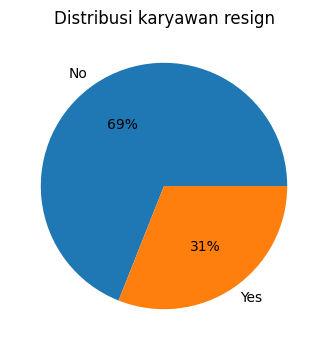

In [99]:
# Distribusi karyawan resign
plt.figure(figsize=(6, 4))
count = df.groupby('Resign').agg(count = ('EnterpriseID', 'nunique')).reset_index()
plt.pie(count['count'], labels = count['Resign'], autopct='%.0f%%')
plt.title('Distribusi karyawan resign')
plt.show()

Terdapat 31% karyawan yang resign.

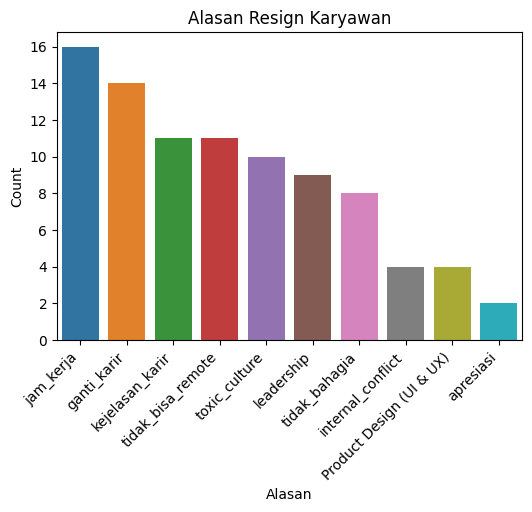

In [100]:
# Distribusi Alasan Resign
plt.figure(figsize=(6, 4))
counts = df[df['AlasanResign'] != 'masih_bekerja']['AlasanResign'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='AlasanResign', data=df[df['AlasanResign'] != 'masih_bekerja'], order=counts.index)
plt.xticks(rotation=45, ha='right') # rotate x-labels
plt.xlabel('Alasan')
plt.ylabel('Count')
plt.title('Alasan Resign Karyawan')
plt.show()

Alasan terbesar karyawan yang resign adalah karena ada masalah dengan jam kantor, kemudian alasan terbesar kedua adalah karyawan ingin mengganti karirnya.

**Melihat distribusi jenis kelamin dari karyawan yang resign**

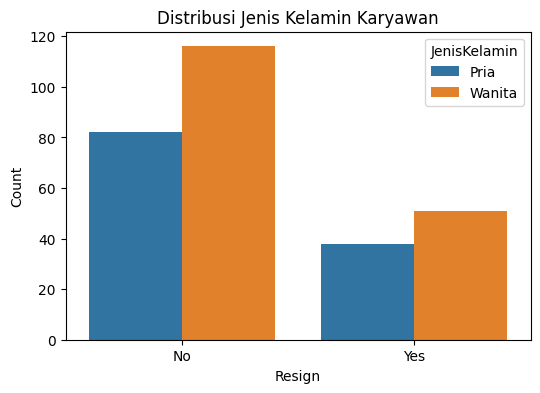

In [101]:
# Distribusi Jenis kelamin dari karyawan Resign
count = df.groupby(['Resign', 'JenisKelamin']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Resign', y = 'count', hue = 'JenisKelamin', data = count)
plt.xlabel('Resign')
plt.ylabel('Count')
plt.title('Distribusi Jenis Kelamin Karyawan')
plt.show()

Ternyata dari semua karyawan yang resign, lebih banyak karyawan Wanita dibandingkan dengan karyawan pria.

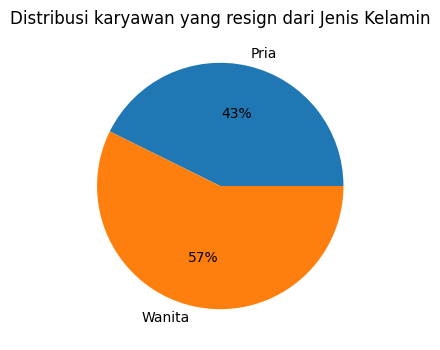

In [113]:
# Distribusi karyawan resign dari Jenis Kelamin
plt.figure(figsize=(6, 4))
count = df[df['Resign'] == 'Yes'].groupby('JenisKelamin').agg(count = ('EnterpriseID', 'nunique')).reset_index()
plt.pie(count['count'], labels = count['JenisKelamin'], autopct='%.0f%%')
plt.title('Distribusi karyawan yang resign dari Jenis Kelamin')
plt.show()

Diketahui 57% dari seluruh karyawan yang resign merupakan wanita.

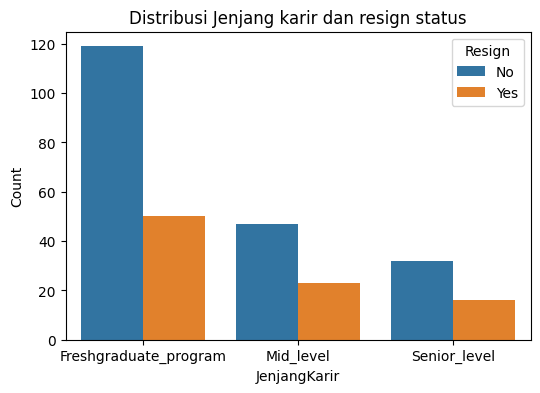

In [117]:
# Distribusi karyawan yang Ikut Program LOP dan status Resign
count = df.groupby(['JenjangKarir', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='JenjangKarir', y = 'count', hue = 'Resign', data = count)
plt.xlabel('JenjangKarir')
plt.ylabel('Count')
plt.title('Distribusi Jenjang karir dan resign status')
plt.show()

Dari tiap jenjang karir, lebih banyak karyawan yang tidak resign.

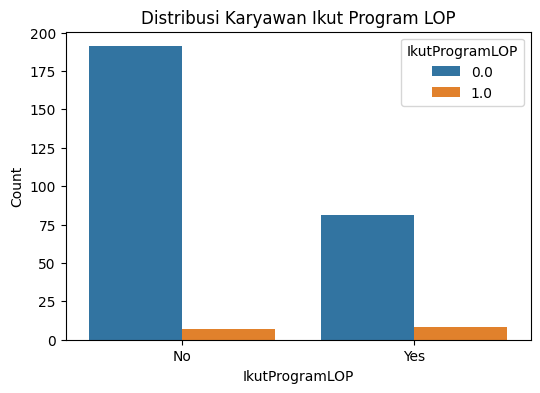

In [102]:
# Distribusi karyawan yang Ikut Program LOP dan status Resign
count = df.groupby(['IkutProgramLOP', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Resign', y = 'count', hue = 'IkutProgramLOP', data = count)
plt.xlabel('IkutProgramLOP')
plt.ylabel('Count')
plt.title('Distribusi Karyawan Ikut Program LOP')
plt.show()

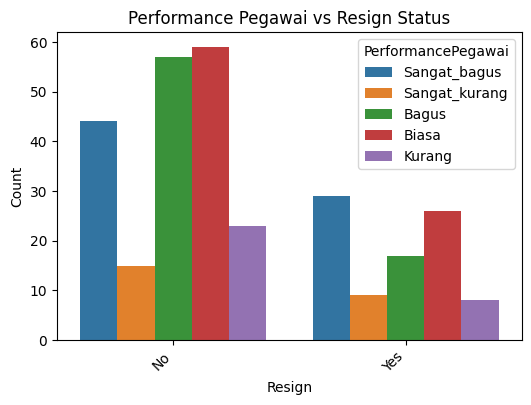

In [133]:
# Distribusi Jumlah Performance Pegawai
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Resign', hue = 'PerformancePegawai', data=df)
plt.xticks(rotation=45, ha='right') # rotate x-labels
plt.xlabel('Resign')
plt.ylabel('Count')
plt.title('Performance Pegawai vs Resign Status')
plt.show()

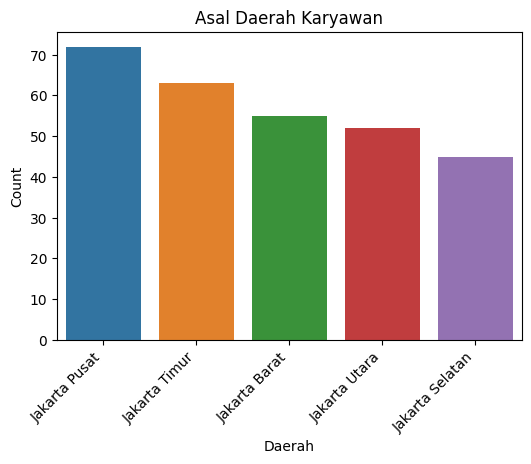

In [103]:
# Distribusi Alasan Resign
plt.figure(figsize=(6, 4))
counts = df['AsalDaerah'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='AsalDaerah', data=df, order=counts.index)
plt.xticks(rotation=45, ha='right') # rotate x-labels
plt.xlabel('Daerah')
plt.ylabel('Count')
plt.title('Asal Daerah Karyawan')
plt.show()

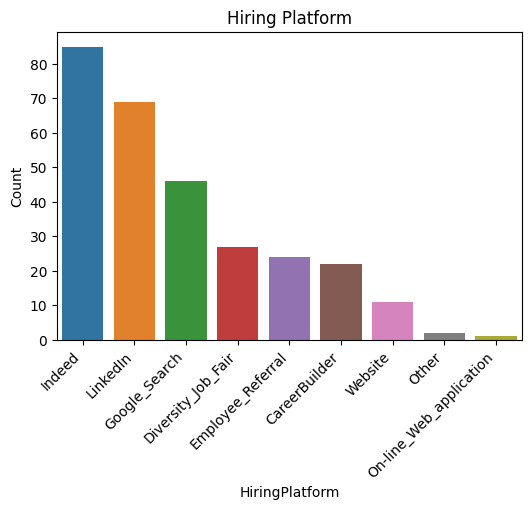

In [104]:
# Distribusi Alasan Resign
plt.figure(figsize=(6, 4))
counts = df['HiringPlatform'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='HiringPlatform', data=df, order=counts.index)
plt.xticks(rotation=45, ha='right') # rotate x-labels
plt.xlabel('HiringPlatform')
plt.ylabel('Count')
plt.title('Hiring Platform')
plt.show()

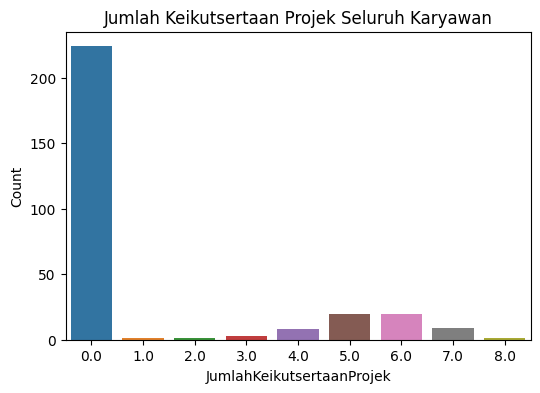

In [135]:
# Distribusi Jumlah Keikutsertaan Projek
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='JumlahKeikutsertaanProjek', data=df)
plt.xlabel('JumlahKeikutsertaanProjek')
plt.ylabel('Count')
plt.title('Jumlah Keikutsertaan Projek Seluruh Karyawan')
plt.show()

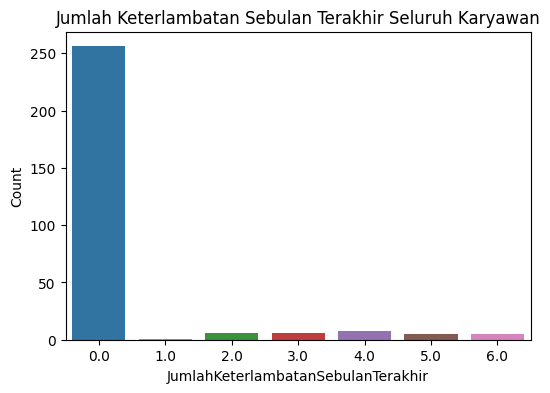

In [137]:
# Distribusi Jumlah Keterlambatan Sebulan Terakhir
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='JumlahKeterlambatanSebulanTerakhir', data=df)
plt.xlabel('JumlahKeterlambatanSebulanTerakhir')
plt.ylabel('Count')
plt.title('Jumlah Keterlambatan Sebulan Terakhir Seluruh Karyawan')
plt.show()

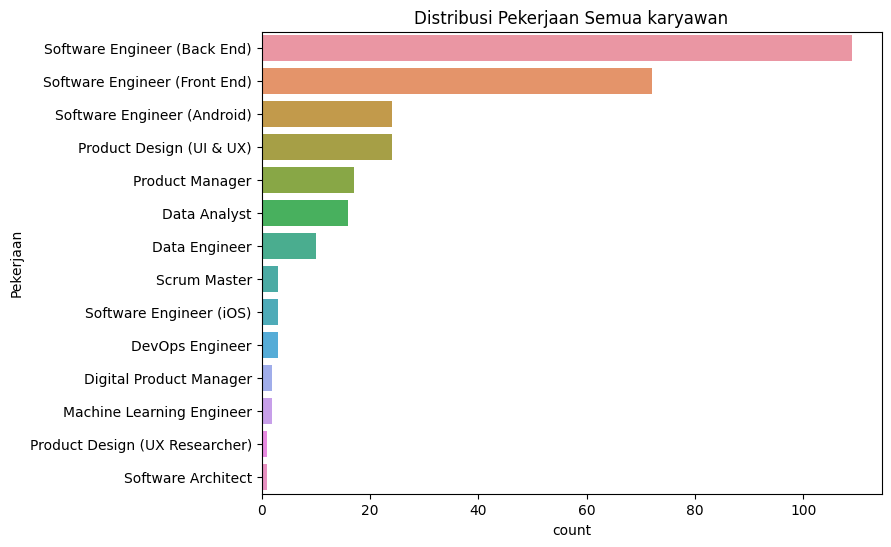

In [150]:
# Distribusi pekerjaan semua karyawan
counts = df['Pekerjaan'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 6))  # set ukuran figure
# create count plot
sns.countplot(y="Pekerjaan", data=df, order = counts.index)
plt.title('Distribusi Pekerjaan Semua karyawan')
plt.show()

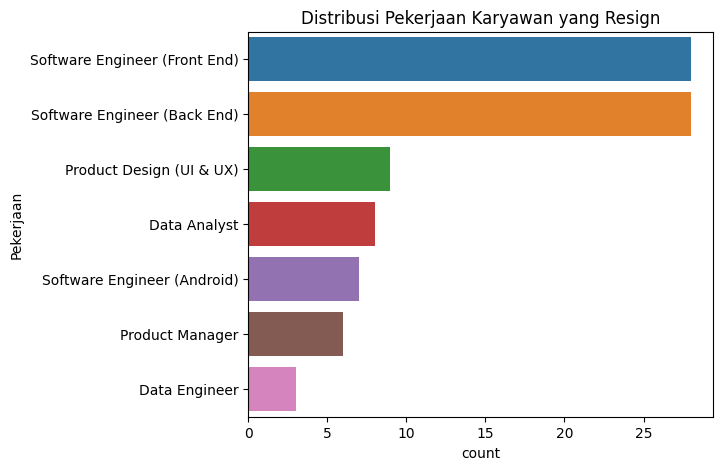

In [152]:
# Distribusi pekerjaan karyawan yang resign
counts = df[df['Resign']=='Yes']['Pekerjaan'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(6, 5))  # set ukuran figure
# create count plot
sns.countplot(y="Pekerjaan", data=df[df['Resign']=='Yes'], order = counts.index)
plt.title('Distribusi Pekerjaan Karyawan yang Resign')
plt.show()

In [138]:
set(df['Pekerjaan'])

{'Data Analyst',
 'Data Engineer',
 'DevOps Engineer',
 'Digital Product Manager',
 'Machine Learning Engineer',
 'Product Design (UI & UX)',
 'Product Design (UX Researcher)',
 'Product Manager',
 'Scrum Master',
 'Software Architect',
 'Software Engineer (Android)',
 'Software Engineer (Back End)',
 'Software Engineer (Front End)',
 'Software Engineer (iOS)'}